In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("merged_weather_pm25.csv")  # replace with your filename


In [3]:
# Drop non-numeric or unhelpful columns (like name, icon, preciptype)
df = df.drop(columns=["name",'date'])

# Drop rows with missing values
df.dropna(inplace=True)

In [4]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,pm25
0,76.2,60.6,67.1,76.2,60.6,67.1,60.7,80.7,0.0,0,...,304.2,1015.6,14.3,1.2,157.8,13.6,7,10,0.67,249
1,71.7,58.9,63.6,71.7,58.9,63.6,57.9,82.2,0.0,0,...,312.7,1015.9,18.5,1.2,147.6,12.7,6,10,0.70,256
2,73.4,59.0,63.8,73.4,59.0,63.8,57.9,81.8,0.0,0,...,353.6,1015.8,39.2,1.3,169.6,14.7,7,10,0.73,225
3,75.4,57.2,65.1,75.4,57.2,65.1,59.2,82.1,0.0,0,...,79.3,1015.4,29.4,1.0,167.6,14.6,7,10,0.75,268
4,71.2,57.2,63.6,71.2,57.2,63.6,59.7,87.6,0.0,0,...,97.9,1016.2,39.8,0.9,181.6,15.5,7,10,0.80,226


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [6]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_split=8,
    random_state=42
)

In [9]:
# Train
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=8, random_state=42)

In [10]:
y_pred = rf.predict(X_test)

In [11]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [12]:
print(f"🌲 Random Forest MAE: {mae:.2f}")
print(f"🌲 Random Forest MSE: {mse:.2f}")

🌲 Random Forest MAE: 20.46
🌲 Random Forest MSE: 706.58


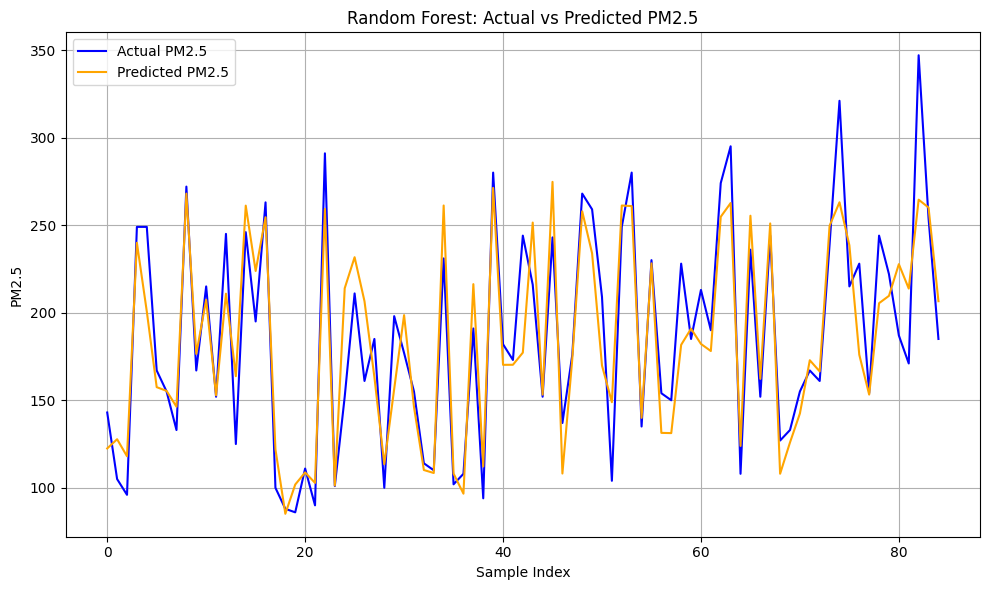

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual PM2.5', color='blue')
plt.plot(y_pred, label='Predicted PM2.5', color='orange')
plt.title("Random Forest: Actual vs Predicted PM2.5")
plt.xlabel("Sample Index")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
